In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_caba = pd.read_feather('./data/CovidCabaFeather')
df_caba.head()

,index,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,...,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id
0,0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaT,...,NO,NaT,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0
1,6,1000008,F,69.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,...,NO,NaT,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0
2,8,1000010,M,7.0,Años,Argentina,CABA,COMUNA 07,CABA,NaT,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7
3,10,1000012,M,46.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-26,...,NO,NaT,NO,2,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2,2020-05-31,0
4,13,1000015,F,29.0,Años,Argentina,CABA,COMUNA 07,Buenos Aires,2020-05-18,...,NO,NaT,NO,6,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7


In [3]:
pd.unique(df_caba.residencia_departamento_nombre .values)

array(['SIN ESPECIFICAR', 'COMUNA 07', 'COMUNA 03', 'COMUNA 04',
       'COMUNA 02', 'COMUNA 12', 'COMUNA 06', 'COMUNA 13', 'COMUNA 08',
       'COMUNA 05', 'COMUNA 15', 'COMUNA 10', 'COMUNA 14', 'COMUNA 01',
       'COMUNA 09', 'COMUNA 11'], dtype=object)

## Unificamos la escala de edades

Dividimos las edades en meses por 12 asi medimos todo en años

In [4]:
df_caba.loc[df_caba.edad_años_meses == 'Meses', 'edad'] = df_caba.edad / 12
df_caba.loc[df_caba.edad_años_meses == 'Meses',:]

,index,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,...,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id
161,737,1000994,F,0.333333,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-06-01,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-06-01,0
325,1366,1001796,F,0.500000,Meses,Argentina,CABA,COMUNA 07,CABA,NaT,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,NaT,7
343,1409,1001862,NR,0.500000,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,NaT,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-06-01,0
457,1707,1002272,F,0.500000,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,0
511,1853,1002474,M,0.833333,Meses,Argentina,CABA,COMUNA 07,CABA,NaT,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - Activo Inter...,Confirmado,2,2020-06-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360486,2359087,996913,NR,0.916667,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,NaT,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-05-31,0
360660,2359558,997460,F,0.750000,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-28,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-05-28,0
360861,2360168,998140,F,0.583333,Meses,Argentina,CABA,COMUNA 01,CABA,NaT,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,1
360954,2360461,998524,F,0.833333,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,NaT,...,NO,NaT,NO,2,Privado,Caso Descartado,Descartado,2,2020-05-29,0


Con las edades unificadas removemos la columna 'edad_años_meses' y aprovechamos para sacar tambien las columnas 'residencia_provincia_nombre', 'residencia_pais_nombre', 'sepi (semana epidemiologica) apertura', 'carga_provincia_id', 'residencia_provincia_id','residencia_departamento_id' ya solo vamos a usar los datos de CABA.

In [5]:
pd.get_dummies(df_caba.residencia_pais_nombre).describe()

,Argentina,Bolivia,Paraguay,SIN ESPECIFICAR,Venezuela
count,361133.000000,361133.000000,361133.000000,361133.000000,361133.000000
mean,0.976214,0.000011,0.000014,0.023759,0.000003
std,0.152383,0.003328,0.003721,0.152296,0.001664
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_caba = pd.get_dummies(data=df_caba, columns=['residencia_pais_nombre'])
df_caba.drop(['residencia_pais_nombre_Paraguay', 'residencia_pais_nombre_Bolivia', 'residencia_pais_nombre_SIN ESPECIFICAR', 'residencia_pais_nombre_Venezuela'], axis=1, inplace=True)

df_caba = df_caba.rename(columns={'residencia_pais_nombre_Argentina':'argentino'})

In [7]:
df_caba = df_caba.drop(['index', 'edad_años_meses', 'residencia_provincia_nombre','sepi_apertura',
                       'carga_provincia_id','residencia_provincia_id','residencia_departamento_id', 'id_evento_caso'], axis=1)

In [8]:
df_caba.tail()

,sexo,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico,argentino
361128,F,27.0,SIN ESPECIFICAR,CABA,2020-05-15,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Público,Caso Descartado,Descartado,2020-06-01,1
361129,M,38.0,SIN ESPECIFICAR,Tucumán,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Público,Caso Descartado,Descartado,2020-06-02,1
361130,F,50.0,SIN ESPECIFICAR,CABA,2020-05-28,2020-06-01,2020-05-31,NO,NaT,NO,NaT,NO,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-06-01,1
361131,M,42.0,SIN ESPECIFICAR,CABA,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Privado,Caso Descartado,Descartado,2020-06-01,1
361132,F,30.0,SIN ESPECIFICAR,Córdoba,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Público,Caso Descartado,Descartado,2020-06-02,1


## Modificamos las columnas con strings 'SI'/'NO' por variables booleanas.

In [9]:
df_caba.fallecido = pd.Categorical(df_caba.fallecido)
df_caba.fallecido = df_caba.fallecido.cat.codes

df_caba.cuidado_intensivo = pd.Categorical(df_caba.cuidado_intensivo)
df_caba.cuidado_intensivo = df_caba.cuidado_intensivo.cat.codes

df_caba.asistencia_respiratoria_mecanica = pd.Categorical(df_caba.asistencia_respiratoria_mecanica)
df_caba.asistencia_respiratoria_mecanica = df_caba.asistencia_respiratoria_mecanica.cat.codes

df_caba = pd.get_dummies(data=df_caba, columns=['origen_financiamiento'])
df_caba = df_caba.rename(columns={'origen_financiamiento_Privado':'privado', 'origen_financiamiento_Público':'publico'})

## Ordenamos los datos de acuerdo a la fecha de apertura


In [10]:
df_caba = df_caba.sort_values(by='fecha_apertura')
df_caba.reset_index(inplace=True,drop=True)
df_caba

,sexo,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,clasificacion,clasificacion_resumen,fecha_diagnostico,argentino,privado,publico
0,F,41.0,COMUNA 12,CABA,2020-01-23,2020-01-31,NaT,0,NaT,0,NaT,0,Caso Invalidado Epidemiologicamente,Descartado,NaT,1,0,1
1,F,34.0,SIN ESPECIFICAR,CABA,2020-01-16,2020-01-31,NaT,0,NaT,0,NaT,0,Caso Descartado,Descartado,2020-02-11,1,1,0
2,F,31.0,SIN ESPECIFICAR,CABA,NaT,2020-01-31,NaT,0,NaT,0,NaT,0,Caso Descartado,Descartado,2020-02-11,1,1,0
3,M,29.0,COMUNA 11,CABA,2020-02-03,2020-02-05,NaT,0,NaT,0,NaT,0,Otro diagnostico,Descartado,NaT,1,0,1
4,F,32.0,SIN ESPECIFICAR,CABA,NaT,2020-02-26,NaT,0,NaT,0,NaT,0,Caso Invalidado Epidemiologicamente,Descartado,NaT,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361128,M,60.0,SIN ESPECIFICAR,CABA,2020-09-19,2020-09-30,NaT,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-10-01,1,1,0
361129,M,45.0,SIN ESPECIFICAR,CABA,2020-09-26,2020-09-30,NaT,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-10-01,1,1,0
361130,F,55.0,COMUNA 04,CABA,NaT,2020-09-30,2020-09-30,0,NaT,0,NaT,0,Caso Descartado,Descartado,2020-09-30,1,0,1
361131,M,15.0,SIN ESPECIFICAR,CABA,NaT,2020-09-30,NaT,0,NaT,0,NaT,0,Caso Descartado,Descartado,2020-09-30,1,1,0


In [11]:
df_caba.isnull().sum()

sexo                                     0
edad                                   256
residencia_departamento_nombre           0
carga_provincia_nombre                   0
fecha_inicio_sintomas               189734
fecha_apertura                           0
fecha_internacion                   317362
cuidado_intensivo                        0
fecha_cui_intensivo                 356249
fallecido                                0
fecha_fallecimiento                 355767
asistencia_respiratoria_mecanica         0
clasificacion                            0
clasificacion_resumen                    0
fecha_diagnostico                    34788
argentino                                0
privado                                  0
publico                                  0
dtype: int64

### Transformamos "fecha_inicio_sintomas" y "fecha_internacion" en variables booleanas


In [12]:
df_caba['presenta_sintomas'] = df_caba['fecha_inicio_sintomas'].notnull()
df_caba['requiere_internacion'] = df_caba['fecha_internacion'].notnull()

Ahora que transformamos las variables, descartamos las columnas originales: "fecha_inicio_sintomas" y "fecha_internacion". Aprovechamos y descartamos "fecha_cuidado_intensivo" tambien.

In [ ]:
#df_caba = df_caba.drop(['fecha_inicio_sintomas', 'fecha_internacion','fecha_cui_intensivo'],axis=1)

### Creamos un df unicamente con casos CONFIRMADOS de CABA

In [13]:
df_confirmados = pd.DataFrame(df_caba.loc[df_caba.clasificacion_resumen == 'Confirmado'])
df_confirmados.reset_index(inplace=True,drop=True)
df_confirmados.head() #notar que el primer caso confirmado fue el 02-03-2020

,sexo,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,clasificacion,clasificacion_resumen,fecha_diagnostico,argentino,privado,publico,presenta_sintomas,requiere_internacion
0,M,43.0,COMUNA 01,CABA,2020-02-28,2020-03-02,2020-03-01,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-03,1,1,0,True,True
1,M,24.0,COMUNA 13,CABA,2020-03-01,2020-03-05,2020-03-03,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-11,1,1,0,True,True
2,M,47.0,COMUNA 03,CABA,2020-03-03,2020-03-05,2020-03-03,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-03-06,1,1,0,True,True
3,F,72.0,COMUNA 07,CABA,2020-03-04,2020-03-05,NaT,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-06,1,0,1,True,False
4,M,45.0,COMUNA 05,CABA,2020-03-04,2020-03-05,NaT,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-03-06,1,1,0,True,False


## Evaluamos datos faltantes por columnas de Datos Confirmados

### ¿Qué hacemos con los datos faltantes?

- edad --> descartar esos datos

- Agregar columna que define si es argentino o no

- "fecha_inicio_sintomas" y "fecha_internacion" --> las transformamoes en variables booleanas y descartamos las columnas originales

- "fecha_cuidado_intensivo" --> descartar y quedarse unicamente con la columna de "cuidado_intensivo"

- "fecha_fallecimiento" --> descartar

- "fecha_diagnostico" --> DESCARTAR


In [14]:
df_confirmados.isnull().sum()

sexo                                     0
edad                                    37
residencia_departamento_nombre           0
carga_provincia_nombre                   0
fecha_inicio_sintomas                47648
fecha_apertura                           0
fecha_internacion                   107319
cuidado_intensivo                        0
fecha_cui_intensivo                 124735
fallecido                                0
fecha_fallecimiento                 122894
asistencia_respiratoria_mecanica         0
clasificacion                            0
clasificacion_resumen                    0
fecha_diagnostico                      635
argentino                                0
privado                                  0
publico                                  0
presenta_sintomas                        0
requiere_internacion                     0
dtype: int64

In [15]:
# Eliminamos datos faltantes

df_confirmados = df_confirmados.drop(df_confirmados.loc[df_confirmados.edad.isnull(),:].index)

df_confirmados = df_confirmados.drop(df_confirmados.loc[df_confirmados.sexo == 'NR',:].index)
df_confirmados = pd.get_dummies(data=df_confirmados, columns=['sexo'])

In [16]:
df_confirmados['confirmado'] = 1

### Generamos columna con personas mayo a 70 años

In [18]:
mayor_65 = np.where(df_confirmados.edad >= 65, 1, 0)
df_confirmados['mayor_65'] = mayor_65

df_confirmados

,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,...,fecha_diagnostico,argentino,privado,publico,presenta_sintomas,requiere_internacion,sexo_F,sexo_M,confirmado,mayor_65
0,43.0,COMUNA 01,CABA,2020-02-28,2020-03-02,2020-03-01,0,NaT,0,NaT,...,2020-03-03,1,1,0,True,True,0,1,1,0
1,24.0,COMUNA 13,CABA,2020-03-01,2020-03-05,2020-03-03,0,NaT,0,NaT,...,2020-03-11,1,1,0,True,True,0,1,1,0
2,47.0,COMUNA 03,CABA,2020-03-03,2020-03-05,2020-03-03,0,NaT,0,NaT,...,2020-03-06,1,1,0,True,True,0,1,1,0
3,72.0,COMUNA 07,CABA,2020-03-04,2020-03-05,NaT,0,NaT,0,NaT,...,2020-03-06,1,0,1,True,False,1,0,1,1
4,45.0,COMUNA 05,CABA,2020-03-04,2020-03-05,NaT,0,NaT,0,NaT,...,2020-03-06,1,1,0,True,False,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127049,41.0,SIN ESPECIFICAR,CABA,NaT,2020-09-30,NaT,0,NaT,0,NaT,...,2020-09-29,1,1,0,False,False,1,0,1,0
127050,78.0,SIN ESPECIFICAR,CABA,2020-09-24,2020-09-30,NaT,0,NaT,0,NaT,...,2020-10-01,1,1,0,True,False,1,0,1,1
127051,60.0,SIN ESPECIFICAR,CABA,2020-09-19,2020-09-30,NaT,0,NaT,0,NaT,...,2020-10-01,1,1,0,True,False,0,1,1,0
127052,45.0,SIN ESPECIFICAR,CABA,2020-09-26,2020-09-30,NaT,0,NaT,0,NaT,...,2020-10-01,1,1,0,True,False,0,1,1,0


### Analizamos casos confirmados acumulados diarios

In [20]:
pivot = pd.pivot_table(df_confirmados, values = ['confirmado','fallecido', 'asistencia_respiratoria_mecanica', 'requiere_internacion', 'presenta_sintomas', 'cuidado_intensivo','edad', 'publico', 'privado','sexo_F','sexo_M', 'argentino','mayor_65'], index = 'fecha_apertura', fill_value=0, aggfunc = np.sum)
pivot.edad = pivot.edad / pivot.confirmado
pivot.tail()

,argentino,asistencia_respiratoria_mecanica,confirmado,cuidado_intensivo,edad,fallecido,mayor_65,presenta_sintomas,privado,publico,requiere_internacion,sexo_F,sexo_M
fecha_apertura,,,,,,,,,,,,,
2020-09-26,678,7,694,9,44.386167,12,123,359,394,300,54,348,346
2020-09-27,556,2,567,6,40.890212,7,76,335,307,260,45,274,293
2020-09-28,764,3,785,6,41.391614,9,113,431,480,305,53,399,386
2020-09-29,892,4,906,4,42.691685,9,137,454,531,375,57,449,457
2020-09-30,830,3,853,9,42.136186,12,134,452,513,340,59,426,427


In [21]:
df_pivot = pivot.reindex(pd.DatetimeIndex(pd.date_range('03-01-2020', '09-30-2020')), fill_value=0)

# Renombro algunas columnas
df_pivot = df_pivot.rename(columns={'asistencia_respiratoria_mecanica':'asistencia_respiratoria',
                                    'fallecido':'fallecidos','confirmado':'confirmados',
                                    'presenta_sintomas':'presentan_sintomas', 'requiere_internacion':'internacion'})

## Graficamos


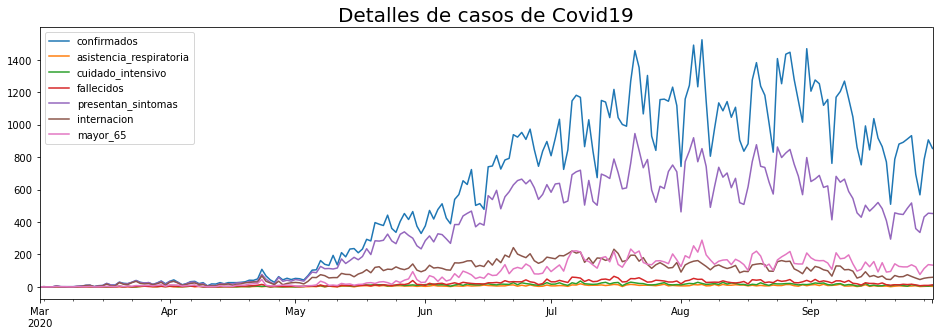

In [22]:
df_pivot.plot(use_index=True,y=['confirmados','asistencia_respiratoria','cuidado_intensivo','fallecidos','presentan_sintomas','internacion','mayor_65'],
              figsize=(16,5))

plt.title('Detalles de casos de Covid19', size = 20)

plt.legend()
plt.show()

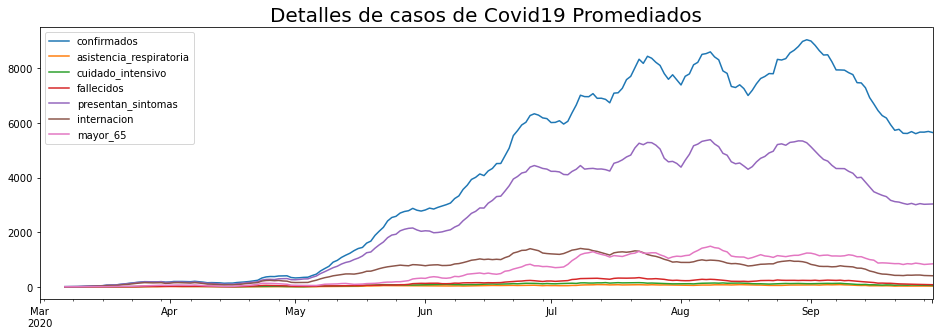

In [23]:
aux_df = df_pivot.rolling(7).sum()
aux_df.plot(use_index=True,y=['confirmados','asistencia_respiratoria','cuidado_intensivo','fallecidos','presentan_sintomas','internacion','mayor_65'],
              figsize=(16,5))

plt.title('Detalles de casos de Covid19 Promediados', size = 20)

plt.legend()
plt.show()

## Analizamos la correlación entre las variables

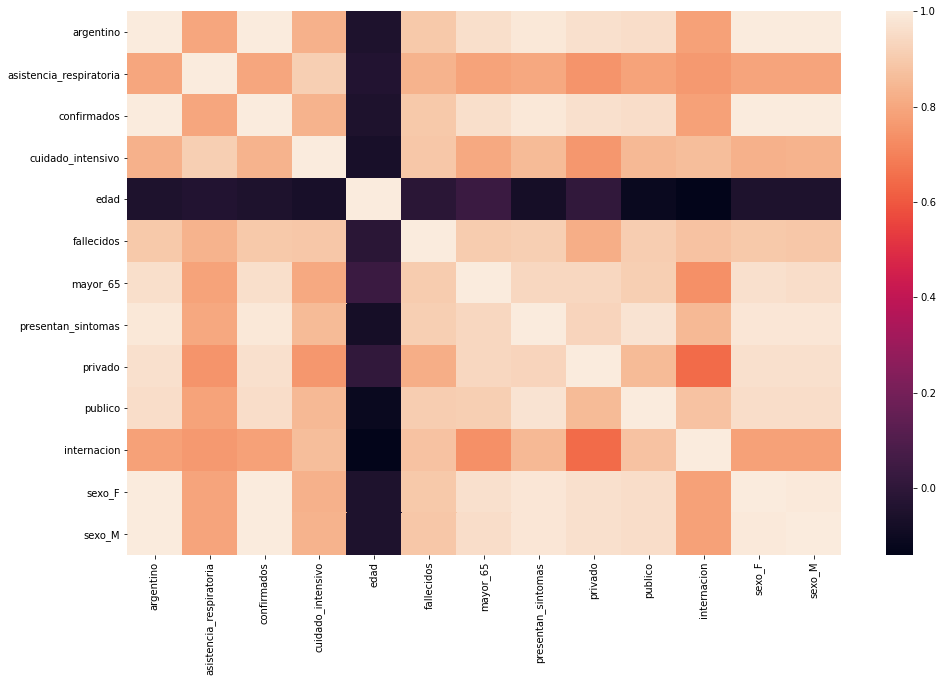

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(df_pivot.corr())
plt.show()

Se puede observar que la cantidad de fallecidos presenta correlaciones altas con todas las variables. Si bien la menor correlacion se da con asistencia respiratoria mecanica, los valores de correlacion siguen siendo altos. 
Tener en cuanta que puede que exista un desfasaje temporal, pero hace falta mas analisis para poder confirmarlo.

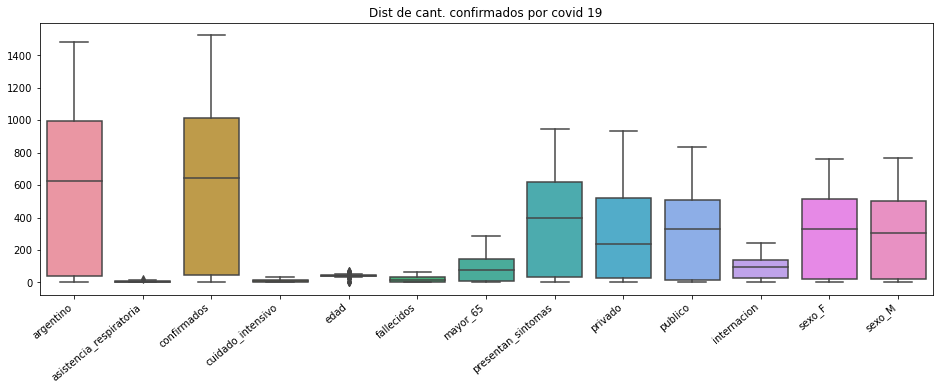

In [27]:
plt.figure(figsize=(16,5))
plot=sns.boxplot(data=df_pivot)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.title("Dist de cant. confirmados por covid 19")
plt.show()

## Guardamos el Dataset

In [28]:
df = df_pivot.reset_index()
df.to_feather('./data/pivot_data')

Levantarlo corriendo:

In [29]:
df = pd.read_feather('./data/pivot_data')

df.index = df['index']
df.drop('index', axis=1, inplace=True)

df

,argentino,asistencia_respiratoria,confirmados,cuidado_intensivo,edad,fallecidos,mayor_65,presentan_sintomas,privado,publico,internacion,sexo_F,sexo_M
index,,,,,,,,,,,,,
2020-03-01,0,0,0,0,0.000000,0,0,0,0,0,0,0,0
2020-03-02,1,0,1,0,43.000000,0,0,1,1,0,1,0,1
2020-03-03,0,0,0,0,0.000000,0,0,0,0,0,0,0,0
2020-03-04,0,0,0,0,0.000000,0,0,0,0,0,0,0,0
2020-03-05,5,1,5,1,50.600000,1,2,5,3,2,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,678,7,694,9,44.386167,12,123,359,394,300,54,348,346
2020-09-27,556,2,567,6,40.890212,7,76,335,307,260,45,274,293
2020-09-28,764,3,785,6,41.391614,9,113,431,480,305,53,399,386
